# Scraping BBC News

### Install stuff and set dependencies

In [1]:
!python -m spacy download en_core_web_sm

Looking in indexes: http://pypi.hudltools.com
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


### Basic NLP with spaCy
https://spacy.io/

https://spacy.io/api/annotation#named-entities

Untrained

In [2]:
import spacy
from spacy import displacy
import pandas as pd
import seaborn as sns
from collections import Counter
import en_core_web_sm
from matplotlib import pyplot as plt
nlp = en_core_web_sm.load()
sns.set()

### Looking at web pages
https://www.dataquest.io/blog/web-scraping-tutorial-python/

In [3]:
import requests
base_url = 'https://www.bbc.co.uk'
page = requests.get(f"{base_url}/news")
print(page)
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')
headline_links = soup.select('a.gs-c-promo-heading')
hl_links = []
for hl in headline_links:
    hl_links.append( hl['href'] if hl['href'].startswith('http') else f"{base_url}{hl['href']}")
print(hl_links)

<Response [200]>
['https://www.bbc.co.uk/news/live/world-52044452', 'https://www.bbc.co.uk/news/live/world-52044452', 'https://www.bbc.co.uk/news/uk-52044542', 'https://www.bbc.co.uk/news/health-51714498', 'https://www.bbc.co.uk/news/business-52043896', 'https://www.bbc.co.uk/news/world-asia-52046339', 'https://www.bbc.co.uk/news/world-australia-52043554', 'https://www.bbc.co.uk/news/health-52043924', 'https://www.bbc.co.uk/news/health-52043924', 'https://www.bbc.co.uk/news/uk-politics-52048632', 'https://www.bbc.co.uk/news/health-52044339', 'https://www.bbc.co.uk/news/business-52043767', 'https://www.bbc.co.uk/news/uk-scotland-52045977', 'https://www.bbc.co.uk/news/business-52045797', 'https://www.bbc.co.uk/news/science-environment-52040822', 'https://www.bbc.co.uk/news/live/world-52044452', 'https://www.bbc.co.uk/news/live/world-52044452', 'https://www.bbc.co.uk/news/uk-52044542', 'https://www.bbc.co.uk/news/health-51714498', 'https://www.bbc.co.uk/news/business-52043896', 'https://w

In [4]:
def get_story_content(url: str):
    page_story = requests.get(url)
    print(url, page)
    soup_story = BeautifulSoup(page_story.content, 'html.parser')
    text = [x.get_text() for x in soup_story.select(".story-body__inner p")]
    return text

def get_entities(text):
    entities = []
    for t in text:
        doc = nlp(t)
        for X in doc.ents:
            entities.append((X.text, X.label_))
    return entities

In [5]:
story_content = {l: get_story_content(l) for l in hl_links}

https://www.bbc.co.uk/news/live/world-52044452 <Response [200]>
https://www.bbc.co.uk/news/live/world-52044452 <Response [200]>
https://www.bbc.co.uk/news/uk-52044542 <Response [200]>
https://www.bbc.co.uk/news/health-51714498 <Response [200]>
https://www.bbc.co.uk/news/business-52043896 <Response [200]>
https://www.bbc.co.uk/news/world-asia-52046339 <Response [200]>
https://www.bbc.co.uk/news/world-australia-52043554 <Response [200]>
https://www.bbc.co.uk/news/health-52043924 <Response [200]>
https://www.bbc.co.uk/news/health-52043924 <Response [200]>
https://www.bbc.co.uk/news/uk-politics-52048632 <Response [200]>
https://www.bbc.co.uk/news/health-52044339 <Response [200]>
https://www.bbc.co.uk/news/business-52043767 <Response [200]>
https://www.bbc.co.uk/news/uk-scotland-52045977 <Response [200]>
https://www.bbc.co.uk/news/business-52045797 <Response [200]>
https://www.bbc.co.uk/news/science-environment-52040822 <Response [200]>
https://www.bbc.co.uk/news/live/world-52044452 <Respon

In [6]:
entities = {k: get_entities(story_content[k]) for k in list(story_content.keys())}

In [7]:
types = {entity[1] for k in list(entities.keys()) for entity in entities[k]}
types

{'CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART'}

In [8]:
entity = [entity[0] for k in entities for entity in entities[k] if entity[1] == 'ORG']
entity_count = {e: entity.count(e) for e in { *entity }}
entity_count = {k: v for k, v in sorted(entity_count.items(), key=lambda item: item[1], reverse=True)}

In [9]:
entity_count

{'NHS': 36,
 'BBC': 24,
 'Tiff': 8,
 'PPE': 7,
 'Oxford': 7,
 'Popper': 6,
 'Calderwood': 5,
 'Greig': 4,
 'GP': 4,
 'Guardian': 4,
 'Coronavirus': 4,
 'Public Health England': 4,
 'Amazon': 4,
 'eSports': 3,
 'BPAS': 3,
 'Universal Credit': 3,
 'Health': 3,
 'Mehfuz': 3,
 'FIFA': 3,
 'the World Health Organization': 3,
 'Cera': 3,
 'Radio 1 Newsbeat': 3,
 'the British Pregnancy Advisory Service': 2,
 'Charlotte': 2,
 'the Department of Health': 2,
 'NHS England': 2,
 'ECMO': 2,
 'UK Finance': 2,
 'Virgin Media': 2,
 'FCO': 2,
 'Sun': 2,
 'NHS Providers': 2,
 'Treasury': 2,
 'Times': 2,
 'Walsall': 2,
 'Croydon': 2,
 'the Foreign Office': 2,
 'RCGP': 2,
 'Airbus': 2,
 'BMA': 2,
 'Dyson': 2,
 'GKN': 2,
 'BBB': 2,
 'Radio 1': 2,
 'the British Medical Association': 2,
 'Fair Business Banking': 1,
 'Jonathan.Amos-INTERNET@bbc.co.uk': 1,
 'the City Council': 1,
 'Neal Maupay': 1,
 'Rainfall Rescue Project': 1,
 'The Royal College of Midwives': 1,
 'the Healthcare Supply Association': 1,
 'V

### Try Flair
https://github.com/flairNLP/flair

Built on Pytorch
#### Named entity recognition

In [10]:
from flair.data import Sentence
from flair.models import SequenceTagger
tagger = SequenceTagger.load('ner')

def get_entities_flair(text, k):
    print("Processing ", k)
    entities = []
    for t in text:
        sentence = Sentence(t)
        tagger.predict(sentence)
        for entity in sentence.get_spans('ner'):
            entity = entity.to_dict()
            processed_entity = "".join([character for character in entity['text'] if character.isalnum()]).lower()
            entities.append((entity['text'], entity['type']))
    return entities

2020-03-26 11:18:12,560 loading file /Users/chris.hunt/.flair/models/en-ner-conll03-v0.4.pt


In [11]:
flair_entities = {k: get_entities_flair(story_content[k], k) for k in list(story_content.keys())}

Processing  https://www.bbc.co.uk/news/live/world-52044452
Processing  https://www.bbc.co.uk/news/uk-52044542
Processing  https://www.bbc.co.uk/news/health-51714498
Processing  https://www.bbc.co.uk/news/business-52043896
Processing  https://www.bbc.co.uk/news/world-asia-52046339
Processing  https://www.bbc.co.uk/news/world-australia-52043554
Processing  https://www.bbc.co.uk/news/health-52043924
Processing  https://www.bbc.co.uk/news/uk-politics-52048632
Processing  https://www.bbc.co.uk/news/health-52044339
Processing  https://www.bbc.co.uk/news/business-52043767
Processing  https://www.bbc.co.uk/news/uk-scotland-52045977
Processing  https://www.bbc.co.uk/news/business-52045797
Processing  https://www.bbc.co.uk/news/science-environment-52040822
Processing  https://www.bbc.co.uk/news/uk-scotland-52042786
Processing  https://www.bbc.co.uk/news/health-51711227
Processing  https://www.bbc.co.uk/news/health-51048366
2020-03-26 11:23:37,381 ACHTUNG: An empty Sentence was created! Are there

In [13]:
types = {entity[1] for k in list(entities.keys()) for entity in entities[k]}
types

{'CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART'}

In [14]:
 [entity[0] for k in flair_entities for entity in flair_entities[k] if entity[1] == 'LOC']

['UK',
 'UK',
 'Lancashire,',
 'UK,',
 'England,',
 'London',
 'London.',
 'High Wycombe, Buckinghamshire,',
 'Balmoral',
 'Buckingham Palace',
 'NHS.',
 'England',
 'England',
 'UK.',
 'ExCeL Centre',
 'London',
 'Nightingale Hospital,',
 'Birmingham',
 'Manchester.',
 'UK',
 'Whittingdon Hospital,',
 'London',
 'This Wall',
 'Hackney,',
 'London.',
 'Great Barrier Reef',
 'Australia',
 'England',
 'England.',
 'Scotland,',
 'NHS',
 'Scotland',
 'NHS',
 'Wales',
 'UK',
 'Wiltshire',
 'Cambridge',
 'New York',
 'Scotland',
 'Scotland',
 'London.',
 'East London',
 'Birmingham',
 'Scotland',
 'Scotland',
 'London',
 'Scotland.',
 'Scotland,',
 'UK',
 'Scotland',
 'England',
 'Aberdeenshire',
 'Singapore',
 'Singapore',
 'Singapore',
 'Singapore',
 'China',
 'Singapore',
 'UK',
 'Ben Nevis,',
 'UK',
 'Britain',
 'Hungary',
 'Budapest.',
 'UK',
 'UK',
 'Hungary',
 'Hungary,',
 'Kabul',
 'Riyadh,',
 'UK,',
 'UK',
 'China',
 'Scotland',
 'Wales',
 'NHS 111,',
 'Northern Ireland,',
 'UK',
 '

In [15]:
flair_entities

{'https://www.bbc.co.uk/news/live/world-52044452': [],
 'https://www.bbc.co.uk/news/uk-52044542': [('Rishi Sunak', 'PER'),
  ('Boris Johnson', 'PER'),
  ('UK', 'LOC'),
  ('UK', 'LOC'),
  ('Covid-19,', 'MISC'),
  ('Sunak', 'PER'),
  ('Adam Marshall,', 'PER'),
  ('British Chambers of Commerce,', 'ORG'),
  ("BBC's Today", 'ORG'),
  ('John Healey,', 'PER'),
  ('Lancashire,', 'LOC'),
  ('Today', 'ORG'),
  ("BBC Newsnight's", 'ORG'),
  ('Nick Watt', 'PER'),
  ('Conservative', 'MISC'),
  ('PAYE', 'ORG'),
  ('BBC', 'ORG'),
  ('Simon Jack', 'PER'),
  ('Johnson', 'PER'),
  ('UK,', 'LOC'),
  ('Chris Hopson', 'PER'),
  ('NHS Providers,', 'ORG'),
  ('England,', 'LOC'),
  ('London', 'LOC'),
  ('Today', 'ORG'),
  ('Neil Ferguson,', 'PER'),
  ('London.', 'LOC'),
  ('High Wycombe, Buckinghamshire,', 'LOC'),
  ('Charles.', 'PER'),
  ('Balmoral', 'LOC'),
  ('Duchess of Cornwall,', 'ORG'),
  ('Buckingham Palace', 'LOC'),
  ('British Medical Association', 'ORG'),
  ('NHS.', 'LOC'),
  ('BMA', 'ORG'),
  ('Ed

In [16]:
types = ['LOC', 'ORG', 'MISC']

In [17]:
def clean_text(string):
    return "".join([character for character in string if character.isalnum()]).lower()



def show_chart(type):
    u_entities = {}
    for k in flair_entities:
        u_entities[k] = {clean_text(entity[0]) for entity in flair_entities[k] if entity[1] == type}
    entity = [entity for k in u_entities for entity in u_entities[k]]
    entity_count = {e: entity.count(e) for e in { *entity }}
    entity_count = [{"term": k, "count": v} for k, v in sorted(entity_count.items(), key=lambda item: item[1], reverse=True)]

    df = pd.DataFrame.from_dict(entity_count)
    plt.figure(figsize=(15,6))
    g = sns.barplot(x='term', y='count', data=df.sort_values(['count'], ascending=False).head(10))
    for item in g.get_xticklabels():
        item.set_rotation(90)

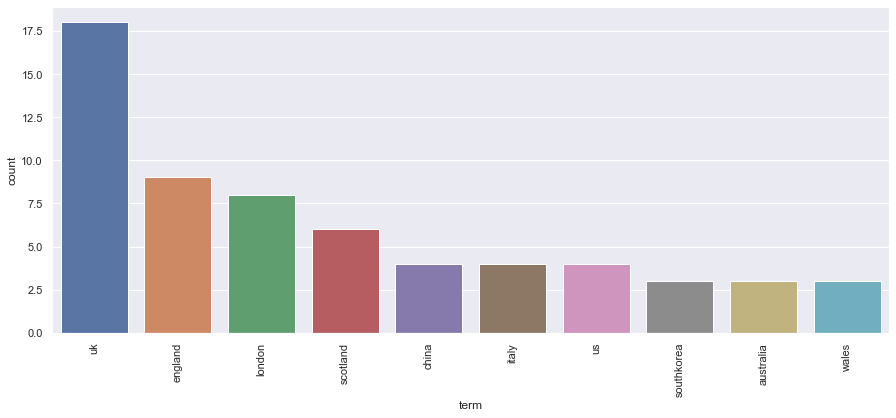

In [18]:
show_chart('LOC')

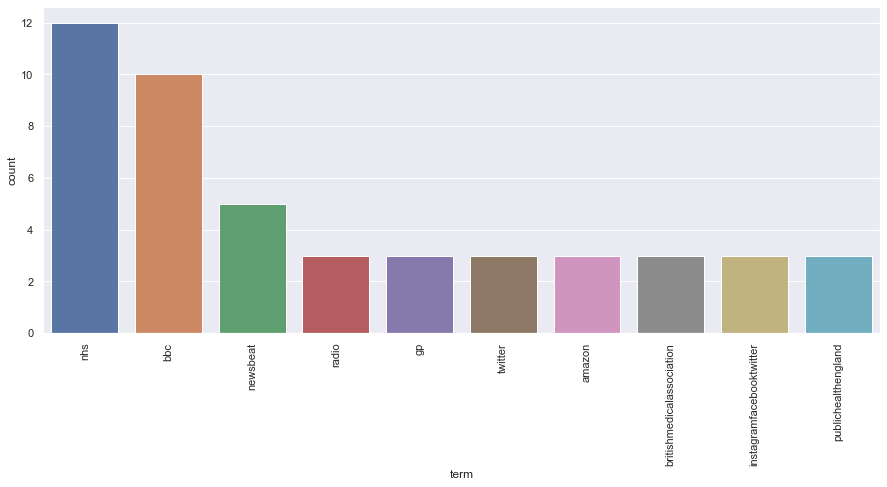

In [19]:
show_chart('ORG')

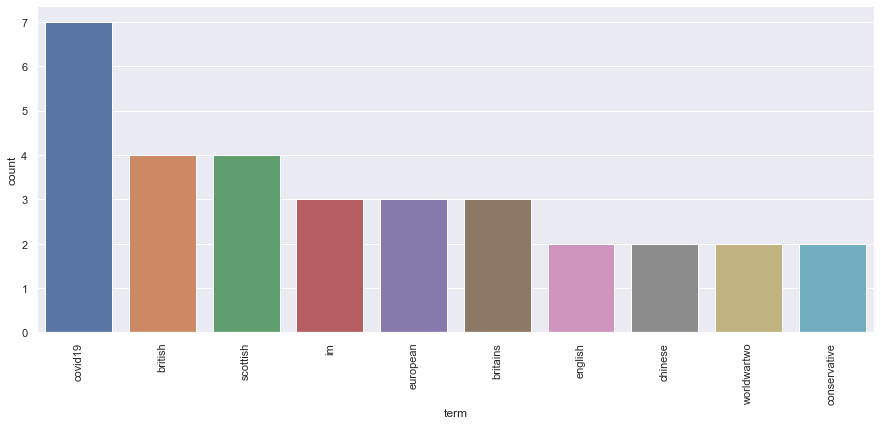

In [20]:
show_chart('MISC')

In [18]:
def find_term(term):
    for url in flair_entities:
        for e in flair_entities[url]:
            if e[0] == term:
                print(url)

In [33]:
find_term('Chris Whitty')

https://www.bbc.co.uk/news/uk-51796072
